# TA-Libによるパターン認識のデモ（その２）

## ライブラリのインポート

In [1]:
import talib
import yfinance as yf
import datetime
from datetime import date
import pandas as pd
import numpy as np
import mplfinance as mpf
from pandas_datareader import data as pdr

## 株価データをダウンロード

In [2]:
start = "2023-08-01"
end = datetime.date.today()
ticker = "3237.T"
yf.pdr_override()
# yahooサイトからデータをダウンロード
df_stock = pdr.get_data_yahoo(ticker, start, end)
df_stock.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-01,58.0,58.0,56.0,57.0,57.0,23400
2023-08-02,56.0,57.0,56.0,56.0,56.0,37500
2023-08-03,56.0,57.0,56.0,56.0,56.0,69300
2023-08-04,56.0,57.0,56.0,57.0,57.0,15200
2023-08-07,57.0,57.0,56.0,57.0,57.0,78700


## TA-Libによりパターンを判定する

In [3]:
# 株価データの系列を取り出す
open = df_stock['Open']
high = df_stock['High']
low = df_stock['Low']
close = df_stock['Adj Close']
# パターンを判定する
engulfing = talib.CDLENGULFING(open,high,low,close)
hammer = talib.CDLHAMMER(open,high,low,close)
piercingLine = talib.CDLPIERCING(open,high,low,close)
# 結果を新しいデータフレームに保存する
df_pattern = pd.DataFrame()
df_pattern['Engulfing'] = engulfing
df_pattern['Hammer'] = hammer
df_pattern['Piercing Line'] = piercingLine
df_pattern.tail()

## ローソク足チャートで確認する

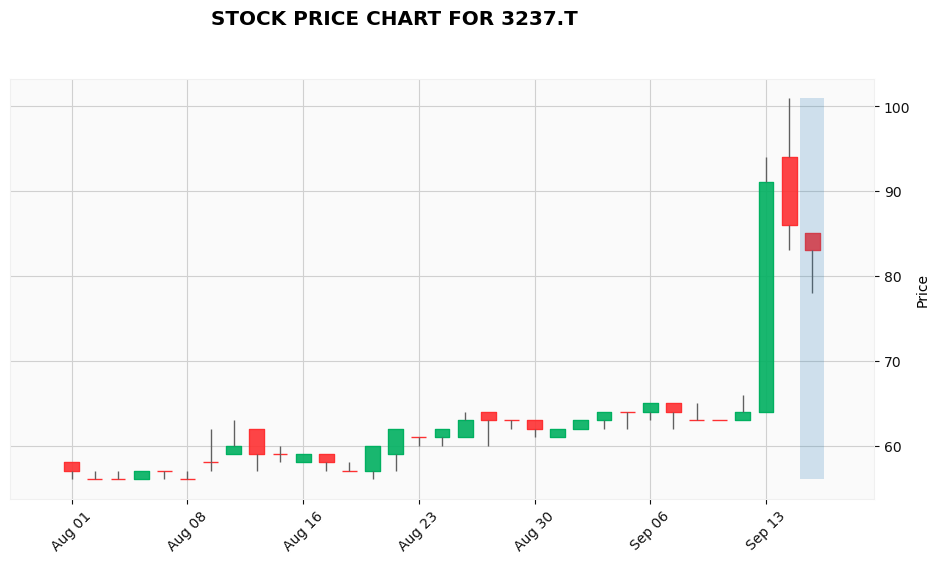

In [5]:
hldate = '2023-09-15'
mpf.plot(df_stock,type='candle',style='yahoo',figsize =(12,6),
          vlines=dict(vlines=hldate,linewidths=16,alpha=0.2),
          title = "STOCK PRICE CHART FOR {0}".format(ticker))